In [1]:
# importing packages
import pandas as pd
pd.options.display.max_rows = 1000 #handy for showing truncated results
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [2]:
# importing data
dating = pd.read_csv('Speed Dating Data 2.csv',encoding="ISO-8859-1")
 # use this encoding, funky error otherwise. thanks kagglers!


FileNotFoundError: ignored

In [ ]:
dating

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,552,22.0,1,44,2,21,22,14,10.0,5,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8374,552,22.0,1,44,2,21,22,13,10.0,4,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8375,552,22.0,1,44,2,21,22,19,10.0,10,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8376,552,22.0,1,44,2,21,22,3,10.0,16,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0


In [ ]:
#BUSCAMOS NULOS
dating.isnull().sum()

iid            0
id             1
gender         0
idg            0
condtn         0
wave           0
round          0
position       0
positin1    1846
order          0
partner        0
pid           10
match          0
int_corr     158
samerace       0
age_o        104
race_o        73
pf_o_att      89
pf_o_sin      89
pf_o_int      89
pf_o_fun      98
pf_o_amb     107
pf_o_sha     129
dec_o          0
attr_o       212
sinc_o       287
intel_o      306
fun_o        360
amb_o        722
shar_o      1076
like_o       250
prob_o       318
met_o        385
age           95
field         63
field_cd      82
undergra    3464
mn_sat      5245
tuition     4795
race          63
imprace       79
imprelig      79
from          79
zipcode     1064
income      4099
goal          79
date          97
go_out        79
career        89
career_c     138
sports        79
tvsports      79
exercise      79
dining        79
museums       79
art           79
hiking        79
gaming        79
clubbing      

In [ ]:
#TENEMOS UNA DATA CON 8378 FILAS Y 195, ENCONTRAMOS MILES DE NULOS, POR LO QUE ELIMINAREMOS 
#LAS COLUMNAS QUE TENGAN MAS DE 4 MIL NULOS.

Text(0, 0.5, 'Frequency')

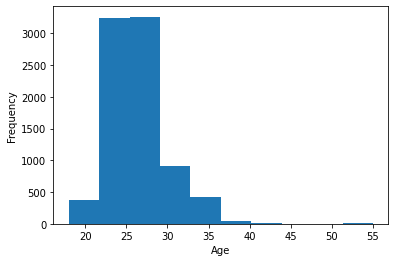

In [ ]:
# VAMOS A VER LA EDAD DE LOS PARTICIPANTES 
#FILTRAMOS VALORES FINITOS DE LA COLUMNA EDAD 
age = dating[np.isfinite(dating['age'])]['age']
plt.hist(age.values)
plt.xlabel('Age')
plt.ylabel('Frequency')

#ENCONTRAMOS QUE LA MAYORIA DE LOS PARTICIPANTES ESTAN EN SUS MID TWIENTIES

In [ ]:
#VAMOS A VER QUIENES ENCONTRARON MATCH, DONDE 0 ES NO MATCH Y 1 ES MATCH
pd.crosstab(index=dating['match'],columns="count")

#20% DE LA GENTE QUE FUE OBTUVO MATCH

col_0,count
match,
0,6998
1,1380


In [ ]:
# narrowing dataset
dating_1 = dating.iloc[:, 11:28]
dating_2 = dating.iloc[:, 30:35]
dating_3 = dating.iloc[:, 39:43]
dating_4 = dating.iloc[:, 45:67]
dating_5 = dating.iloc[:, 69:74]
dating_6 = dating.iloc[:, 87:91]
dating_7 = dating.iloc[:, 97:102]
dating_8 = dating.iloc[:, 104:107]

date = pd.concat([dating.iloc[:, 0],dating.iloc[:, 2],dating_1,dating_2,dating_3,dating_4,dating_5,
                  dating_6,dating_7,dating_8], axis=1)

In [ ]:
date

,iid,gender,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,...,fun3_1,intel3_1,dec,attr,sinc,intel,fun,like,prob,met
0,1,0,11.0,0,0.14,0,27.0,2.0,35.0,20.0,...,8.0,8.0,1,6.0,9.0,7.0,7.0,7.0,6.0,2.0
1,1,0,12.0,0,0.54,0,22.0,2.0,60.0,0.0,...,8.0,8.0,1,7.0,8.0,7.0,8.0,7.0,5.0,1.0
2,1,0,13.0,1,0.16,1,22.0,4.0,19.0,18.0,...,8.0,8.0,1,5.0,8.0,9.0,8.0,7.0,NaN,1.0
3,1,0,14.0,1,0.61,0,23.0,2.0,30.0,5.0,...,8.0,8.0,1,7.0,6.0,8.0,7.0,7.0,6.0,2.0
4,1,0,15.0,1,0.21,0,24.0,3.0,30.0,10.0,...,8.0,8.0,1,5.0,6.0,7.0,7.0,6.0,6.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,552,1,526.0,0,0.64,0,26.0,3.0,10.0,10.0,...,6.0,7.0,0,3.0,5.0,5.0,5.0,2.0,5.0,0.0
8374,552,1,527.0,0,0.71,0,24.0,6.0,50.0,20.0,...,6.0,7.0,0,4.0,6.0,8.0,4.0,4.0,4.0,0.0
8375,552,1,528.0,0,-0.46,0,29.0,3.0,40.0,10.0,...,6.0,7.0,0,4.0,7.0,8.0,8.0,6.0,5.0,0.0
8376,552,1,529.0,0,0.62,0,22.0,4.0,10.0,25.0,...,6.0,7.0,0,4.0,6.0,5.0,4.0,5.0,5.0,0.0


In [ ]:
date.columns

Index(['iid', 'gender', 'pid', 'match', 'int_corr', 'samerace', 'age_o',
       'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb',
       'pf_o_sha', 'dec_o', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'like_o',
       'prob_o', 'met_o', 'age', 'field', 'race', 'imprace', 'imprelig',
       'from', 'goal', 'date', 'go_out', 'career', 'career_c', 'sports',
       'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming',
       'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music',
       'shopping', 'yoga', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1',
       'amb1_1', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'dec', 'attr',
       'sinc', 'intel', 'fun', 'like', 'prob', 'met'],
      dtype='object')

In [ ]:
# counting null values
date.isnull().sum()

iid           0
gender        0
pid          10
match         0
int_corr    158
samerace      0
age_o       104
race_o       73
pf_o_att     89
pf_o_sin     89
pf_o_int     89
pf_o_fun     98
pf_o_amb    107
pf_o_sha    129
dec_o         0
attr_o      212
sinc_o      287
intel_o     306
fun_o       360
like_o      250
prob_o      318
met_o       385
age          95
field        63
race         63
imprace      79
imprelig     79
from         79
goal         79
date         97
go_out       79
career       89
career_c    138
sports       79
tvsports     79
exercise     79
dining       79
museums      79
art          79
hiking       79
gaming       79
clubbing     79
reading      79
tv           79
theater      79
movies       79
concerts     79
music        79
shopping     79
yoga         79
attr1_1      79
sinc1_1      79
intel1_1     79
fun1_1       89
amb1_1       99
attr3_1     105
sinc3_1     105
fun3_1      105
intel3_1    105
dec           0
attr        202
sinc        277
intel   

In [ ]:
# removing null rows 
date2 = date.dropna()

In [ ]:
# checking datatypes
date2.dtypes

In [ ]:
# dropping objects and saving the result in a new numeric only DF
date3 = date2.drop(['field', 'from', 'career'], axis=1)

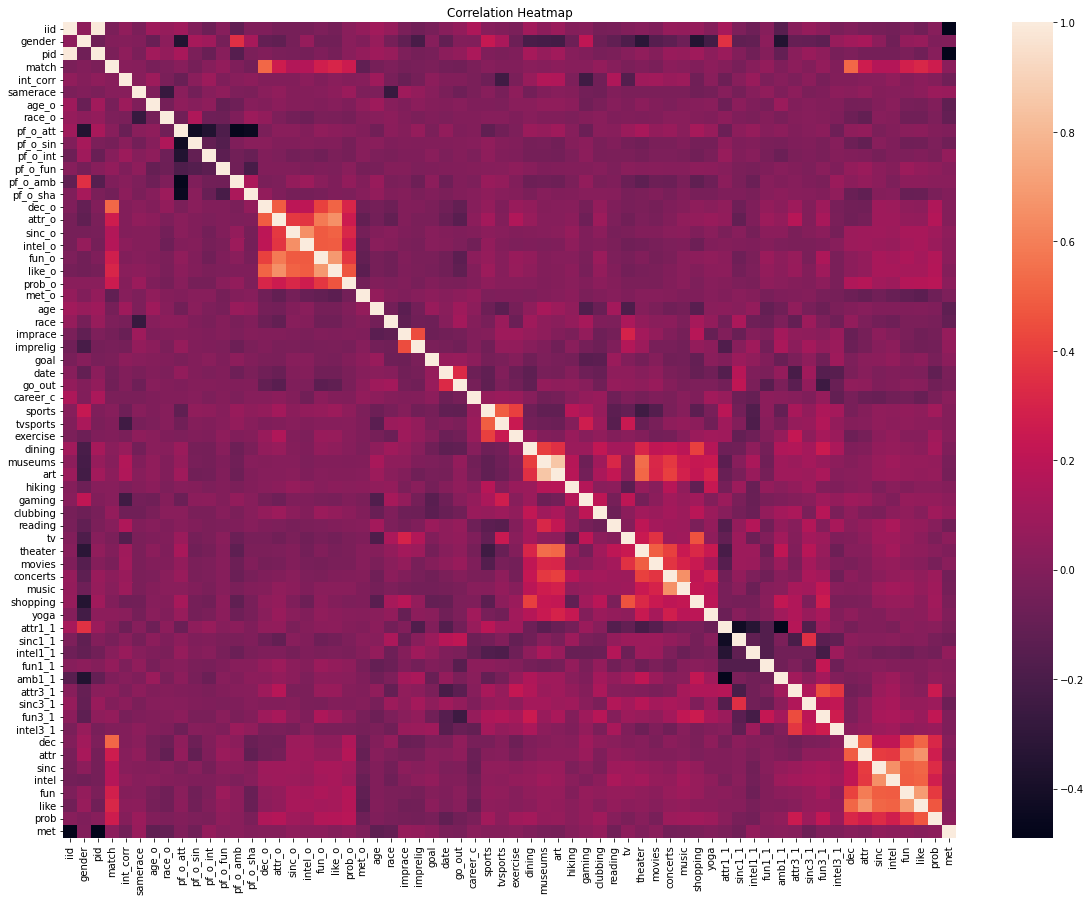

In [ ]:
# heatmap
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Correlation Heatmap")
corr = date3.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [ ]:
#quitar las correlaciones menos a .4

In [ ]:
import pandas as pd

# assume data is a dataframe containing the numerical variables
corr_matrix = date3.corr()
corr_matrix

In [ ]:
# Seleccionar las columnas con una correlación mayor a 0.4 con el target
correlated_cols = corr_matrix.loc[:, (corr_matrix['match'] >= 0.3)].columns

# Mantener solo las columnas seleccionadas
date4 = date3[correlated_cols]

print(date4)

      match  dec_o  like_o  dec  like
30        0      0     6.0    0   6.0
31        0      0     6.0    0   8.0
33        1      1     8.0    1   8.0
34        0      1     9.0    0   7.0
35        0      1     6.0    0   4.0
...     ...    ...     ...  ...   ...
8371      1      1     5.0    1   7.0
8372      0      0     7.0    0   4.0
8374      0      0     2.0    0   4.0
8376      0      1     6.0    0   5.0
8377      0      1     8.0    0   4.0

[6797 rows x 5 columns]


In [ ]:
grouped = data_preferencias.groupby("gender").mean()

print(grouped)

          attr1_1     amb1_1
gender                      
0       17.845700  12.925923
1       26.399696   8.601770


In [ ]:
data_preferencias = date2[["gender","attr1_1","amb1_1"]]

PODEMOS NOTAR QUE A LAS MUJERES EN PROMEDIO, LES INTERESA MAS SALIR CON HOMBRES MAS AMBICIOSOS, MIENTRAS QUE A LOS HOMBRES LES IMPORTA SALIR CON MUJERES MAS ATRACTIVAS.

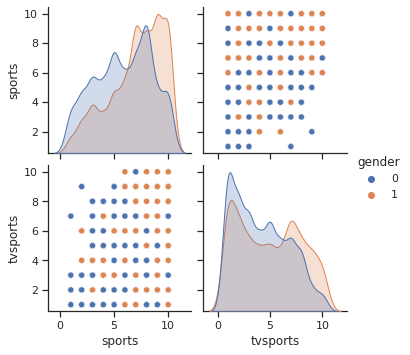

In [ ]:
#GRAFICAS DE INTERESES RESPECTO A CADA GENERO. PARA VER SI EXISTE ALGUNA SIGNIFICANCIA ESTADISTICA 
#RESPECTO A ESTAS VARIABLES.
sns.set(style="ticks", color_codes=True)
date_int = pd.concat([date3.iloc[:, 1],date3.iloc[:, 30:32]],axis = 1)
g = sns.pairplot(date_int, hue="gender")

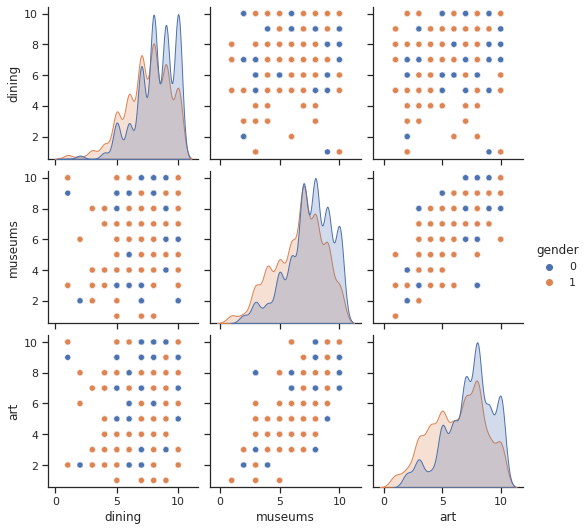

In [ ]:

sns.set(style="ticks", color_codes=True)
date_int = pd.concat([date3.iloc[:, 1],date3.iloc[:, 33:36]],axis = 1)
g = sns.pairplot(date_int, hue="gender")

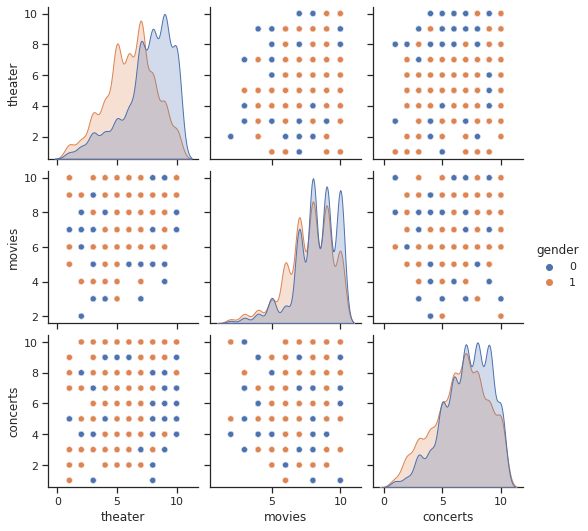

In [ ]:

sns.set(style="ticks", color_codes=True)
date_int2 = pd.concat([date3.iloc[:, 1],date3.iloc[:, 41:44]],axis = 1)
g = sns.pairplot(date_int2, hue="gender")

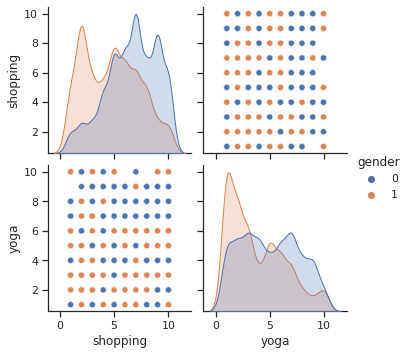

In [ ]:
sns.set(style="ticks", color_codes=True)
date_int3 = pd.concat([date3.iloc[:, 1],date3.iloc[:, 45:47]],axis = 1)
g = sns.pairplot(date_int3, hue="gender")

Es bueno saber como difieren los intereses entre generos ya que podria decirnos que actividad seria buena hacer en una primera date y que ambos disfruten.

Sin embargo, despues de ver las correlaciones, descubrimos que estas variables tienen una correlacion menor .3 contra nuestra variable objetivo "match" por lo que no las ocuparemos en nuestro modelo.



In [ ]:
#quitamos intereses
date4 = date3.drop(['sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 
                    'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 
                   'shopping', 'yoga'], axis=1)

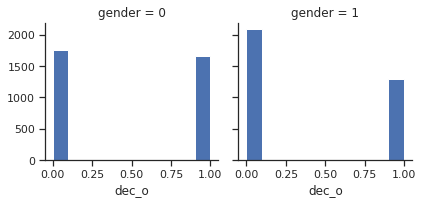

In [ ]:
# decisiones por genero
sns.set(style="ticks", color_codes=True)
g = sns.FacetGrid(date2, col="gender")
g = g.map(plt.hist, "dec_o")
plt.ticklabel_format(useOffset=False, style='plain')

In [ ]:
# chi-square test
gender_crosstab = pd.crosstab(index=date2.gender, columns=date2.dec_o)
gender_table = sm.stats.Table(gender_crosstab)
gender_rslt = gender_table.test_nominal_association()
gender_rslt.pvalue

1.1102230246251565e-16

AQUI HACEMOS UN CHI SQUARE TEST, QUE SIRVE PARA VER SI EXISTE UNA RELACION ESTADISTICAMENTE SIGNIFICATIVA ENTRE LAS VARIABLES GENERO Y LA DECISION. EN ESTE CASO VEMOS QUE 1750 MUJERES RECIBIERON UNA DECISION NEGATIVA CONTRA 1600 MUJERES QUE RECIBIERON UNA DECISION POSITIVA. 
MIENTRAS QUE 2,050 HOMBRES RECIBIERON UNA DECISION NEGATIVA CONTRA SOLO 1300 HOMBRES CON DECISION POSITIVA. EN ESTE CASO EL RESULTADO REAL DIFIERE DE LO QUE NOS CALCULA EL P VALUE, QUE DECIA QUE NO TENIAN RELACION.

Y NO ES ASI.

In [ ]:
# AMOR NO CORRESPONDIDO
#CONTAMOS LAS FILAS EN DONDE dec_o = 1 AND dec = 0 OR a dec = 1 AND dec_o = 0?
AMOR_NO_CORRESPONDIDO = len(date2[(date2['dec_o']==0) & (date2['dec']==1)]) 
+ len(date2[(date2['dec_o']==1) & (date2['dec']==0)])
PORCENTAJE_CORAZON_ROTO = AMOR_NO_CORRESPONDIDO / len(date2.index)
PORCENTAJE_CORAZON_ROTO*100

26.040900397234072

DESCUBRIMOS QUE EL 26% DE LOS PARTICIPANTES LES ROMPIERON EL CORAZON, ALGO MAYOR AL PORCENTAJE DE GENTE QUE NO TUVO UN MATCH. AHORA VAMOS A VER SI EL ATRACTIVO DE LA PERSONA SE RELACION CON QUE TU AMOR NO SEA CORRESPONDIDO.

In [ ]:
# HACEMOS UNA COLUMNA DE AMOR NO CORRESPONDIDO
date2['NO_CORRESPONDIDO']=np.where(((date4['dec_o']==0) & (date4['dec']==1))|((date4['dec']==0) & (date4['dec_o']==1)),1,0)

<ipython-input-90-3200dd4f8daf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date2['NO_CORRESPONDIDO']=np.where(((date4['dec_o']==0) & (date4['dec']==1))|((date4['dec']==0) & (date4['dec_o']==1)),1,0)


Text(0.5, 0, 'CORAZON ROTO')

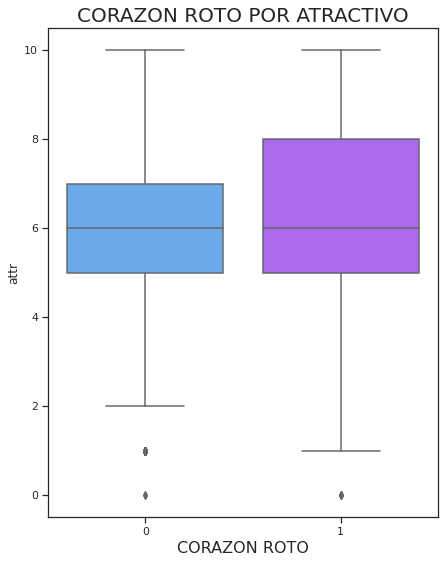

In [ ]:
#PLOTEAMOS AMOR NO CORRESPONDIDO CON ATRACTIVO

plt.figure(figsize=(7,9))
sns.boxplot(x='NO_CORRESPONDIDO', y='attr', data=date2, palette='cool')
plt.title('CORAZON ROTO POR ATRACTIVO', fontsize=20)
plt.xlabel('CORAZON ROTO', fontsize=16)

In [ ]:
# chi-square test
#teoricamente, chi-square nos dice que si estan relacionadas ambas variables ya que es casi menor a .5
bh_crosstab = pd.crosstab(index=date2.attr, columns=date4.NO_CORRESPONDIDO)
bh_table = sm.stats.Table(bh_crosstab)
bh_rslt = bh_table.test_nominal_association()
bh_rslt.pvalue

0.5300021303134914

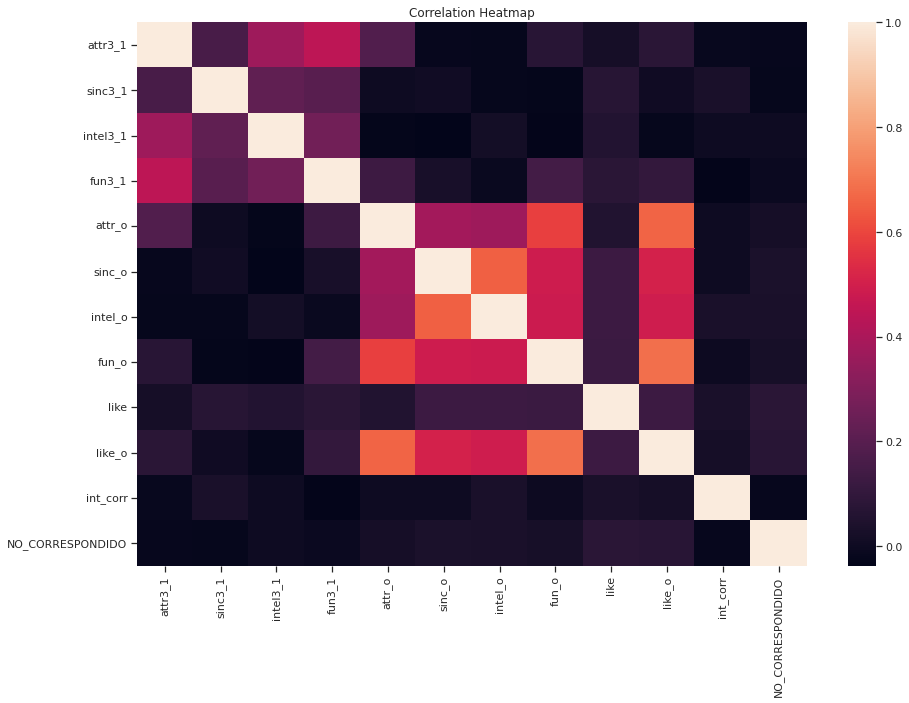

In [ ]:
date5 = pd.concat([date2['attr3_1'],date2['sinc3_1'],date2['intel3_1'],date2['fun3_1'],date2['attr_o'],
                   date2['sinc_o'],date2['intel_o'],date2['fun_o'],date2['like'],date2['like_o'], 
                   date2['int_corr'],date2['NO_CORRESPONDIDO']],axis=1)
plt.subplots(figsize=(15,10))
ax = plt.axes()
ax.set_title("Correlation Heatmap")
corr = date5.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [ ]:
X= date4.drop(['match'], axis=1)

In [ ]:
X

,dec_o,like_o,dec,like
30,0,6.0,0,6.0
31,0,6.0,0,8.0
33,1,8.0,1,8.0
34,1,9.0,0,7.0
35,1,6.0,0,4.0
...,...,...,...,...
8371,1,5.0,1,7.0
8372,0,7.0,0,4.0
8374,0,2.0,0,4.0
8376,1,6.0,0,5.0


In [ ]:
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

In [ ]:
transformer=Normalizer().fit(X)
x_norm=transformer.transform(X)
x_norm=pd.DataFrame(x_norm)

In [ ]:
transformer=StandardScaler().fit(X)
x_stand=transformer.transform(X)
x_stand=pd.DataFrame(x_stand)

In [ ]:
from sklearn.model_selection import train_test_split
y=date3['match']
X_train,X_test,y_train,y_test=train_test_split(x_norm,y,test_size=0.4, random_state=1000)

In [ ]:
X_train_stand,X_test_stand,y_train_stand,y_test_stand=train_test_split(x_stand,y,test_size=0.4, random_state=1000)

In [ ]:
from sklearn.linear_model import LogisticRegression

classification=LogisticRegression(random_state=0,solver='lbfgs',multi_class='ovr').fit(X_train,y_train)

In [ ]:
predictions=classification.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import cohen_kappa_score
from sklearn import metrics

In [ ]:
confusion_mat = confusion_matrix(predictions,y_test)
confusion_mat

array([[2257,  378],
       [   0,   84]])

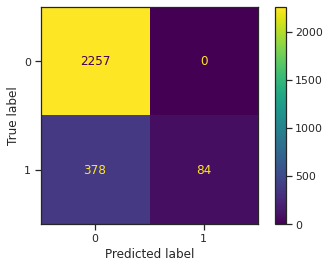

In [ ]:
cm=metrics.confusion_matrix(y_test, predictions)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
from sklearn.linear_model import LogisticRegression

classification=LogisticRegression(random_state=0,solver='lbfgs',multi_class='ovr').fit(X_train_stand,y_train_stand)


In [ ]:
predictions2=classification.predict(X_test)
predictions2

array([0, 0, 0, ..., 0, 0, 0])

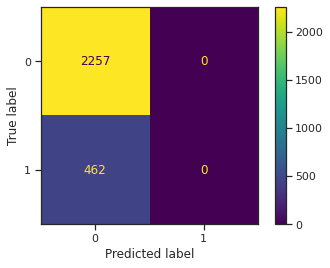

In [ ]:
cm=metrics.confusion_matrix(y_test_stand, predictions2)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
cohen_kappa_score(y_test,predictions) 


0.2695005821069286

In [ ]:
cohen_kappa_score(y_test_stand,predictions2) 

0.0